# Similar Cars Recommendation by using KMeans-Clustering

Author : Prasad Patharvat

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.    

To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.” A cluster refers to a collection of data points aggregated together because of certain similarities. You'll define a target number k, which refers to the number of centroids you need in the dataset.

Elbow Curve :

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned cente

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
from warnings import filterwarnings
filterwarnings ("ignore")

import pandas as pd
A = pd.read_csv("C:Desktop/Cars93.csv")

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Standardize Data by using MinMaxScaler 

In [4]:
from sklearn.preprocessing import MinMaxScaler
nm = MinMaxScaler()
Q = pd.DataFrame(nm.fit_transform(A[["Price","MPG.city"]]),columns=["Price","MPG.city"])

In [5]:
# KMeans determine K

WCSS = []
K = range(1,20,1)
from sklearn.cluster import KMeans
for i in K:
    km = KMeans(n_clusters=i)
    model = km.fit(Q)
    WCSS.append(model.inertia_)  

# Determine k using elbow method

Text(0.5, 0, 'K')

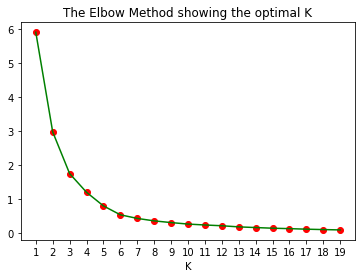

In [6]:
# Plot the elbow

import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="green")
plt.xticks(range(1,20,1))
plt.title('The Elbow Method showing the optimal K')
plt.xlabel('K')

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
model = km.fit(Q)
model.labels_

array([0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2,
       4, 0, 0, 2, 0, 2, 4, 2, 4, 0, 0, 0, 0, 2, 2, 2, 3, 4, 0, 3, 0, 4,
       0, 4, 0, 1, 2, 1, 1, 1, 4, 4, 0, 2, 1, 1, 1, 0, 2, 4, 2, 4, 0, 2,
       2, 0, 0, 2, 2, 0, 4, 0, 2, 2, 2, 2, 4, 4, 0, 0, 3, 4, 0, 0, 2, 0,
       2, 2, 2, 2, 2])

In [8]:
W = A[["Price" , "MPG.city"]]
W['Cluster'] = model.labels_
W['Model'] = A.Make

In [9]:
W.head()

,Price,MPG.city,Cluster,Model
0,15.9,25,0,Acura Integra
1,33.9,18,1,Acura Legend
2,29.1,20,2,Audi 90
3,37.7,19,1,Audi 100
4,30.0,22,2,BMW 535i


In [10]:
W1 = pd.DataFrame(model.cluster_centers_,columns=["X","Y"])

Text(0.5, 1.0, 'Clusters and their Centers')

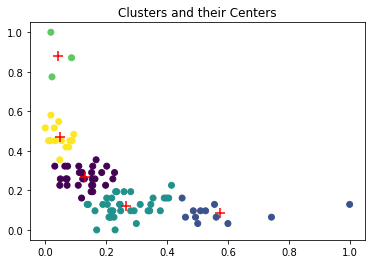

In [12]:
#Clusters and Centers visulazing on Graph

plt.scatter(Q.Price,Q['MPG.city'],c=W.Cluster)
plt.scatter(W1.X,W1.Y,c="red",s=100,marker="+")
plt.title('Clusters and their Centers')

In [14]:
a = input("select your car, and we wil give you recommendations for similar cars also: ")
cluster_number = W[W.Model == a].Cluster.values[0]
similar_cars = list(W[W.Cluster == cluster_number].Model)

select your car, and we wil give you recommendations for similar cars also: Nissan Maxima


In [15]:
similar_cars

['Audi 90',
 'BMW 535i',
 'Buick LeSabre',
 'Buick Roadmaster',
 'Buick Riviera',
 'Chevrolet Camaro',
 'Chevrolet Lumina_APV',
 'Chevrolet Astro',
 'Chevrolet Caprice',
 'Chrylser Concorde',
 'Chrysler Imperial',
 'Dodge Caravan',
 'Dodge Stealth',
 'Eagle Vision',
 'Ford Aerostar',
 'Ford Taurus',
 'Ford Crown_Victoria',
 'Lexus ES300',
 'Mazda MPV',
 'Mercury Cougar',
 'Mitsubishi Diamante',
 'Nissan Quest',
 'Nissan Maxima',
 'Oldsmobile Silhouette',
 'Oldsmobile Eighty-Eight',
 'Pontiac Firebird',
 'Pontiac Grand_Prix',
 'Pontiac Bonneville',
 'Saab 900',
 'Toyota Previa',
 'Volkswagen Eurovan',
 'Volkswagen Passat',
 'Volkswagen Corrado',
 'Volvo 240',
 'Volvo 850']